In [2]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC

In [1]:
1+1

2

In [3]:
df = pd.read_csv("blogtext.csv")

In [4]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
df_train , df_test =  train_test_split(df , test_size=0.15)

In [6]:
tk = TweetTokenizer()

stpW = [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I', 
        'that', 'had', 'on', 'for', 'were', 'was' , "It" , "The","A", "In" ,"And"]   
def token(text): ### tokenizes but also removes stop words    
    text = tk.tokenize(text)
    s= 0
    #print(text)
    while s<len(text):
        if text[s] in stpW:
            #print(text[s])
            text.pop(s)
            #print(text[s])
        else:
            s += 1
    return text

In [7]:
count_vect = CountVectorizer(tokenizer=token)      ##
tf_transformer = TfidfTransformer(use_idf=False)   #try running with tfd set to true

In [9]:
X_train = count_vect.fit_transform(df_train.text[:50000])

In [10]:
X_test = count_vect.transform(df_test.text)
X_train_tf = tf_transformer.fit_transform(X_train)

In [11]:
y_train_tf = df_train.age[:50000]
y_test_tf = df_test.age

In [12]:
X_test_tf = tf_transformer.transform(X_test)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train_tf , y_train_tf)

c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_hat_test = logreg.predict(X_test_tf)   #### array of predcted ages 

## SVC

In [16]:
svc = SVC()
svc.fit(X_train_tf , y_train_tf)

SVC()

In [17]:
y_svc_test = svc.predict(X_test_tf)


pls run grid search/randomized search for the svc model (will take a while run over night )

## Evaluation below

### evaluation logregression

In [18]:
print(accuracy_score(y_test_tf, y_hat_test))
print(precision_score(y_test_tf, y_hat_test,average=None))

0.19297799262180385
[0.         0.3092182  0.22845691 0.21542172 0.23782772 0.15006684
 0.16501712 0.1658256  0.14221517 0.14493949 0.1875     0.27011744
 0.54263566 0.30769231 0.92405063 1.         0.         1.
 0.         0.66666667 0.         0.         0.66666667 0.
 0.         0.72972973]


c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
logreg.classes_

array([13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48], dtype=int64)

In [20]:


def count(k, lis):  
    c = 0
    for i in lis: ### change  to what list 
        if i == k:
            c = c+1
    return c
            
            

In [21]:
counts = []     ##### counts how often age group is represnted in list

for i in logreg.classes_:
    counts.append(count(i, y_test_tf))     
    

In [22]:
y_hat_test[:100]   

array([17, 34, 26, 27, 16, 17, 17, 25, 24, 16, 23, 34, 16, 17, 24, 48, 17,
       34, 23, 16, 23, 24, 23, 24, 24, 16, 23, 15, 24, 17, 23, 16, 24, 23,
       24, 24, 24, 23, 23, 23, 23, 23, 16, 24, 17, 23, 24, 24, 16, 24, 24,
       23, 16, 25, 23, 23, 24, 24, 23, 25, 24, 23, 23, 17, 23, 16, 23, 24,
       16, 35, 24, 24, 24, 16, 24, 16, 34, 16, 24, 17, 24, 27, 25, 25, 15,
       24, 16, 17, 26, 27, 24, 24, 16, 16, 17, 24, 27, 25, 24, 16],
      dtype=int64)

In [23]:
y_test_tf.values[:100] ###array of acctual ages 

array([24, 34, 35, 27, 17, 14, 36, 24, 23, 16, 15, 34, 15, 14, 46, 13, 39,
       34, 25, 23, 25, 27, 33, 27, 16, 16, 26, 16, 26, 14, 25, 16, 27, 17,
       23, 34, 25, 27, 17, 17, 25, 24, 35, 37, 16, 25, 48, 24, 15, 38, 24,
       33, 24, 25, 37, 27, 26, 33, 24, 23, 43, 25, 36, 25, 35, 27, 16, 33,
       42, 35, 36, 23, 25, 23, 25, 15, 24, 16, 39, 27, 26, 16, 24, 15, 17,
       24, 43, 17, 24, 27, 25, 17, 26, 15, 25, 17, 47, 24, 17, 13],
      dtype=int64)

In [24]:
l = y_hat_test-y_test_tf.values   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)


In [25]:
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [26]:
h/len(g) ##### avarge mistake/difference in age (+-) 

5.027868836417367

The mean age diffrance is already quite good. But it does have strong outliners(up to 35 years). So maybe we could try diffrente training function than log.reg. or split the age to age groupes 

In [27]:
max(g)  ### higest mistake/distance

35

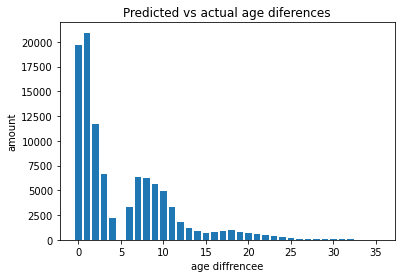

In [28]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(36))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

In [26]:
cf_matrix = confusion_matrix(list(y_test_tf.values), y_hat_test)
cf_matrix[3]

array([  53,  205,  609, 3037, 3667,  757, 1566,  493,  217,  185,    0,
        106,    4,    4,    1,    4,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   12], dtype=int64)

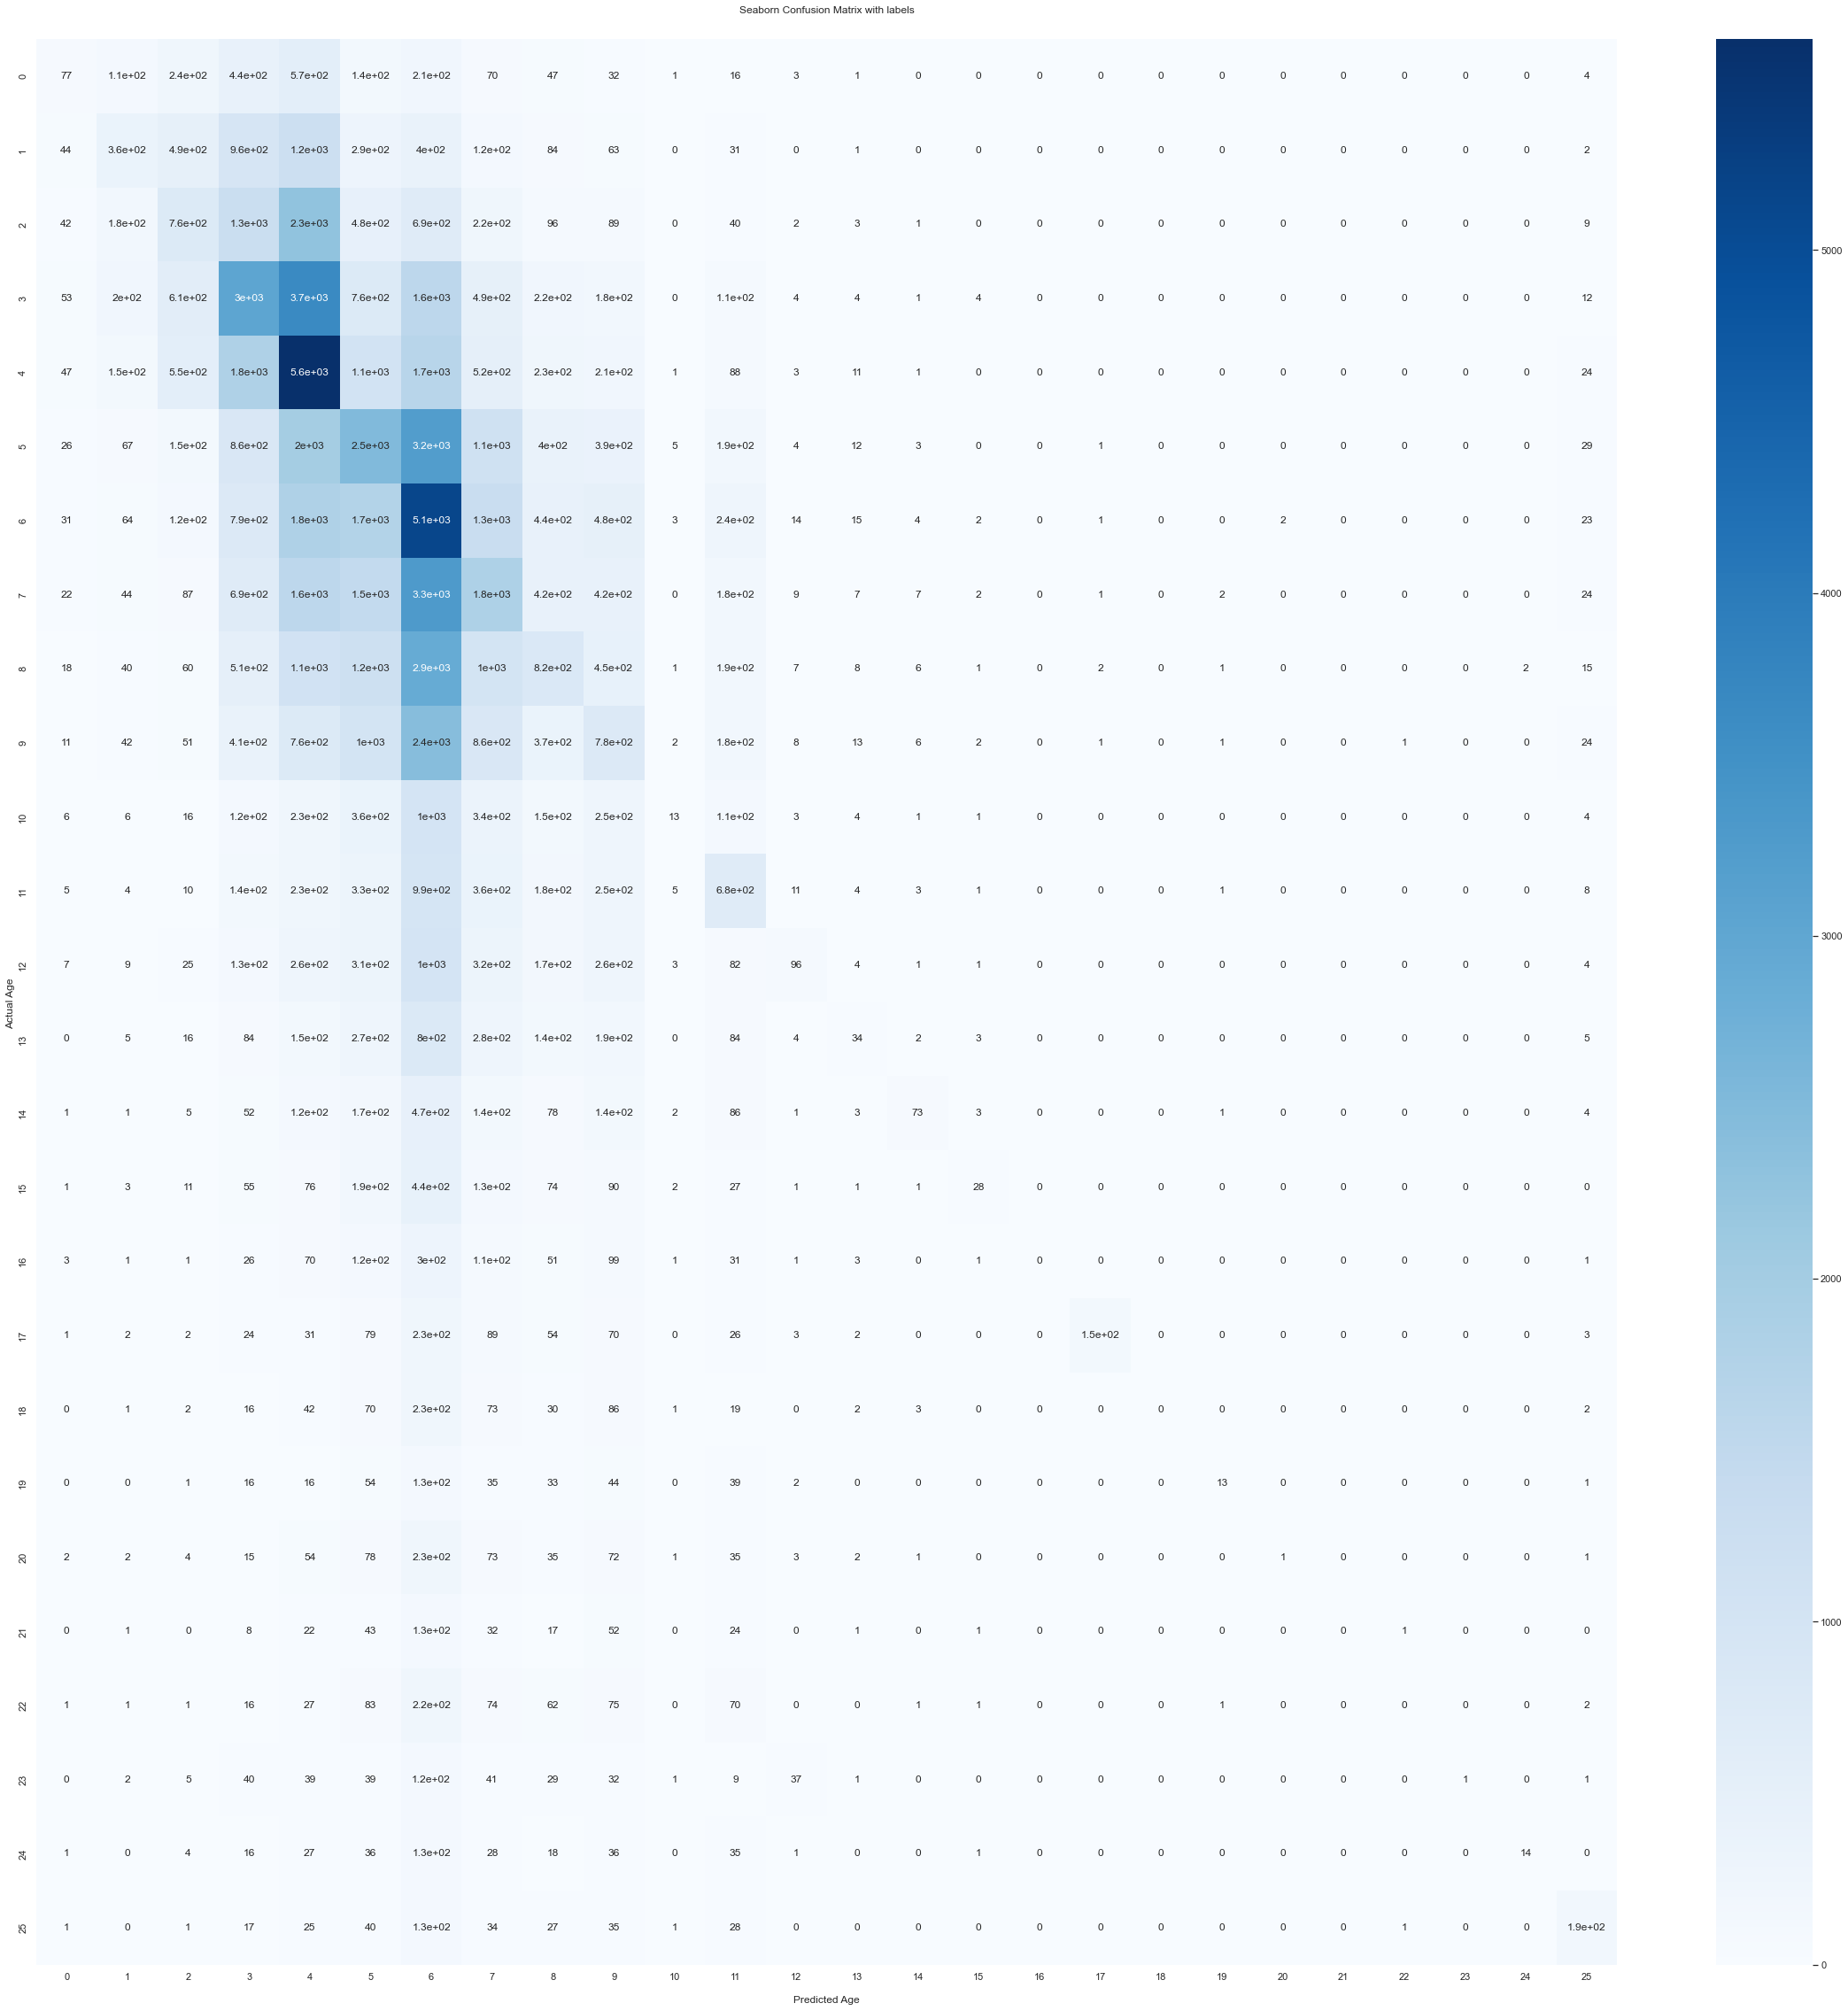

In [27]:
sns.set(rc =  {'figure.figsize':(40,40)},font_scale = 1)

ax = sns.heatmap(cf_matrix, annot=True, 
             cmap='Blues' )




ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Age')
ax.set_ylabel('Actual Age ');




## Display the visualization of the Confusion Matrix.
plt.show()

## evaluating svc

In [30]:
print(accuracy_score(y_test_tf, y_svc_test))
print(precision_score(y_test_tf, y_svc_test,average=None))

0.20090417151859716
[1.         0.6730038  0.40862944 0.23687619 0.23790291 0.15796755
 0.16008457 0.1793246  0.21037464 0.17337165 0.5        0.5814234
 0.71428571 0.8        0.98837209 1.         0.         1.
 0.         0.66666667 1.         0.         0.         0.
 0.         0.92215569]


c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(accuracy_score(y_test_tf, y_hat_test))
print(precision_score(y_test_tf, y_hat_test,average=None))

0.19297799262180385
[0.         0.3092182  0.22845691 0.21542172 0.23782772 0.15006684
 0.16501712 0.1658256  0.14221517 0.14493949 0.1875     0.27011744
 0.54263566 0.30769231 0.92405063 1.         0.         1.
 0.         0.66666667 0.         0.         0.66666667 0.
 0.         0.72972973]


c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
l = y_svc_test-y_test_tf.values   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [34]:
h/len(g)

4.904836926208253

In [36]:
max(g)

33

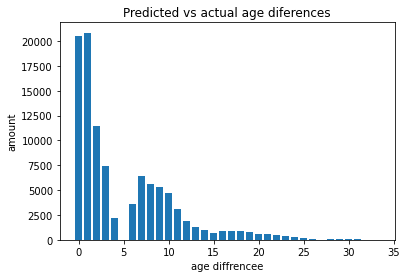

In [38]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(34))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

# Predicting signs as a joke  

In [13]:
stars= ["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", 
        "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]

def star(lis):
    k = []
    for i in lis:
        k.append(stars.index(i))
    return k


In [14]:
star(df_train.sign)

[7,
 7,
 1,
 1,
 6,
 1,
 1,
 3,
 0,
 11,
 1,
 9,
 7,
 3,
 5,
 5,
 9,
 1,
 11,
 2,
 3,
 7,
 1,
 4,
 4,
 0,
 1,
 1,
 7,
 9,
 3,
 2,
 6,
 3,
 2,
 7,
 5,
 11,
 10,
 8,
 3,
 10,
 3,
 1,
 1,
 7,
 0,
 2,
 11,
 7,
 1,
 5,
 2,
 1,
 3,
 4,
 5,
 2,
 1,
 2,
 1,
 0,
 5,
 10,
 3,
 7,
 5,
 9,
 11,
 0,
 9,
 3,
 4,
 11,
 9,
 4,
 9,
 4,
 5,
 11,
 9,
 7,
 3,
 0,
 11,
 1,
 1,
 4,
 1,
 7,
 10,
 9,
 5,
 1,
 3,
 0,
 11,
 3,
 2,
 6,
 0,
 11,
 0,
 5,
 5,
 3,
 8,
 5,
 5,
 3,
 8,
 11,
 7,
 9,
 3,
 10,
 8,
 0,
 2,
 0,
 10,
 10,
 7,
 8,
 11,
 3,
 6,
 11,
 9,
 6,
 7,
 3,
 10,
 10,
 6,
 2,
 8,
 8,
 1,
 6,
 0,
 2,
 10,
 5,
 7,
 5,
 5,
 6,
 3,
 5,
 9,
 0,
 7,
 8,
 3,
 3,
 1,
 0,
 1,
 10,
 0,
 1,
 8,
 11,
 10,
 2,
 2,
 5,
 8,
 10,
 1,
 0,
 1,
 8,
 7,
 9,
 3,
 8,
 0,
 6,
 3,
 6,
 2,
 9,
 11,
 3,
 0,
 7,
 4,
 3,
 10,
 2,
 10,
 0,
 0,
 3,
 11,
 11,
 10,
 5,
 5,
 0,
 3,
 8,
 6,
 7,
 0,
 3,
 8,
 7,
 9,
 8,
 3,
 6,
 11,
 5,
 3,
 8,
 10,
 8,
 7,
 6,
 8,
 1,
 11,
 3,
 1,
 5,
 11,
 6,
 1,
 8,
 3,
 5,
 5,
 2,
 0,
 3,
 9,
 9,
 0,

In [15]:
y_train_start = star(df_train.sign)

y_test_star = star(df_test.sign)

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train_tf , y_train_start)

c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_hat_test = logreg.predict(X_test_tf)   #### array of predcted ages 
print(accuracy_score(y_test_star, y_hat_test))

0.16776100124274657


In [21]:
l = y_hat_test-y_test_star   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)

In [22]:
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [23]:
h/len(g) 

3.6003738025109353

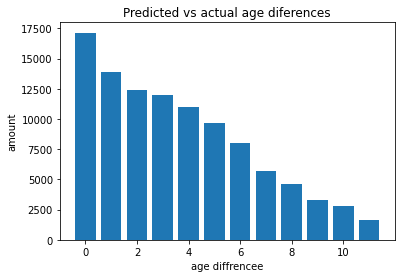

In [24]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(12))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

## Combined ages


In [ ]:
def combine(a):                                      ###############################################
    i= 0
    while i < len(a):
        if a[i] == 17:
            a[i]= 15
            i= i+ 1
        elif a[i] == 14:
            a[i]= 13
            i= i+ 1
        elif a[i] == 16:
            a[i]= 15
            i= i+ 1
        elif a[i] == 24:
            a[i]= 23
            i= i+ 1
        elif a[i] == 26:
            a[i]= 25
            i= i+ 1
        elif a[i] == 27:
            a[i]= 25
            i= i+ 1
        elif a[i] == 34:
            a[i]= 33
            i= i+ 1
        elif a[i] == 36:
            a[i]= 35
            i= i+ 1
        elif a[i] == 38:
            a[i]= 37
            i= i+ 1
        elif a[i] == 40:
            a[i]= 39
            i= i+ 1
        elif a[i] == 42:
            a[i]= 41
            i= i+ 1
        elif a[i] == 44:
            a[i]= 43
            i= i+ 1
        elif a[i] == 46:
            a[i]= 45
            i= i+ 1
        elif a[i] == 48:
            a[i]= 47
            i= i+ 1
        else:
            i=i+1

In [ ]:
y_train_red = df_train.age.values
y_test_red = df_test.age.values

In [ ]:
combine(y_train)
combine(y_test)

In [ ]:
y_train_red = y_train_red.astype('int')
y_test_red = y_test_red.astype('int')

In [ ]:
logreg2 = LogisticRegression()

In [ ]:
logreg2.fit(X_train_tf , y_train_red)

In [ ]:
y_hat_red = logreg2.predict(X_test_tf)

In [ ]:
print(accuracy_score(y_test_red, y_hat_red))
print(precision_score(y_test_red, y_hat_red,average=None))

In [ ]:
logreg.classes_

In [ ]:
counts

In [ ]:
l = y_hat_red-y_test_red   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)


In [ ]:
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [ ]:
h/len(g) 

In [ ]:
max(g)

In [ ]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(35))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

In [ ]:
def combine_decades(a):
    i = 0
    while i < len(a):
        if a[i] <20:
            a[i]= 10
            i= i+ 1
        elif a[i] <30:
            a[i]= 20
            i= i+ 1
        elif a[i]< 40:
            a[i]= 30
            i= i+ 1
        elif a[i]< 50:
            a[i]= 40
            i =i+1

In [ ]:
y_train_dec = df_train.age.values
y_test_dec = df_test.age.values

In [ ]:
combine_decades(y_train)
combine_decades(y_test)

In [ ]:
y_train_dec = y_train_dec.astype('int')
y_test_dec= y_test_dec.astype('int')

In [ ]:
logreg3 = LogisticRegression()

In [ ]:
logreg3.fit(X_train_tf , y_train_dec)

In [ ]:
y_hat_dec = logreg3.predict(X_test_tf)

In [ ]:
print(accuracy_score(y_test_dec, y_hat_dec))
print(precision_score(y_test_dec, y_hat_dec,average=None))

In [ ]:
l = y_hat_dec-y_test_dec   ### creates a list of diffrence between predicted ages and actual ages

g= []    #### all negativ values are made positiv so just distanec between pred and actual value
for i in l:
    if i< 0:
        g.append(-i)
    else:
        g.append(i)

        
h = 0   #####summs all distances to get avarege distance 
for i in  g:
    h= h + i

In [ ]:
h/len(g) 

In [ ]:
max(g)

In [ ]:
i = 0
x=[]
while i <= max(g):
    x.append(g.count(i))
    i= i+1
y =list(range(21))
plt.bar(y,x)
plt.title('Predicted vs actual age diferences')
plt.xlabel('age diffrencee')
plt.ylabel('amount')
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_test_dec, y_hat_dec)
cf_matrix

In [ ]:
sns.set(rc =  {'figure.figsize':(40,40)},font_scale = 5)

ax = sns.heatmap(cf_matrix, annot=True, 
             cmap='Blues' )




ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Age')
ax.set_ylabel('Actual Age ');




## Display the visualization of the Confusion Matrix.
plt.show()

## Adding ngrams

In [6]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [25]:
len(df_train.text)

579091

In [26]:
model = CountVectorizer(tokenizer=token, ngram_range = (2, 2))

In [27]:
X_train_ngram = model.fit_transform(df_train.text[:50000])

In [29]:
X_test_ngram = model.transform(df_test.text)
X_train_ngram_tf = tf_transformer.fit_transform(X_train_ngram)

In [30]:
X_test_ngram_tf = tf_transformer.transform(X_test_ngram)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train_ngram , y_train_tf[:50000])

c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_hat_test = logreg.predict(X_test_ngram_tf)  

In [37]:
print(accuracy_score(y_test_tf, y_hat_test))
print(precision_score(y_test_tf, y_hat_test,average=None))

0.17985576311489046
[1.         0.92045455 0.65       0.25289682 0.21563935 0.14906868
 0.14837953 0.29525653 0.41333333 0.36065574 0.         1.
 1.         1.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


c:\users\dan hagen\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
